
# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    ‘Neighborhood’ indicates the location of the hospital.
    ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família(opens in a new tab).
    'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show


### Questions for Analysis

1.Does appointment scheduled much earlier has any effect on no_show?

2.In which location most of appointments are not honored?

3.Which age group has more diabetic and hypertension?

4.What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


<a id='wrangling'></a>
## Data Wrangling

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
# Reading dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(-1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No


In [83]:
# Getting dimension of dataset
df.shape

(110527, 14)

In [84]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


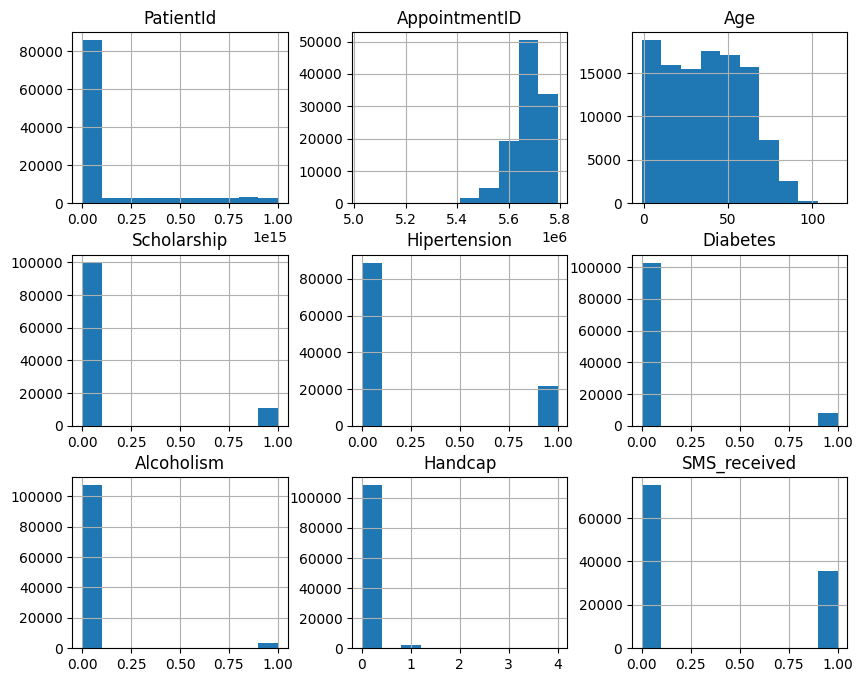

In [85]:
df.hist(figsize=(10,8));

In [86]:
# Checking for duplicates
df.duplicated().sum()

0

In [87]:
# Checking for missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [88]:
df['PatientId'].nunique()

62299

In [89]:
df['AppointmentID'].nunique()

110527

In [90]:
df['Neighbourhood'].value_counts()
# There are 81 locations

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [91]:
df.groupby(['Age','PatientId'])['Age'].count()

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

In [92]:
df.Handcap.value_counts()
# It looks like categorical value, with no. of disability 4 being the highest

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [93]:
df.groupby(['Gender','No-show'])['Gender'].count()
# Gender 

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: Gender, dtype: int64

### Data Cleaning

In [94]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### Column names
Correct the mis-spelled columns

Columns are in mixed case, it can be easy to use if it is in lowercase

In [95]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

In [96]:
# Converting column names to lower case
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hypertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handicap        110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


##### Fixing datatypes
- Datatype of scheduledday is in string , convert it to datetime
- Datatype of appointmentday is in string , convert it to datetime

In [98]:
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

##### Data Type Optimization
- Convert patientid from float to int

- Datatype of appointmentid,age,scholarship,diabetes,hipertension,alcoholism,handcap,sms_received can be converted from 'int64' to 'int8' to reduce memory usage

In [99]:
# Optimizing datatype to reduce memory usage
int_col = ['patientid','appointmentid','age','scholarship','diabetes','hypertension','alcoholism','handicap','sms_received']
for col in int_col:
    df[col] = df[col].astype('int8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  int8               
 1   appointmentid   110527 non-null  int8               
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int8               
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int8               
 8   hypertension    110527 non-null  int8               
 9   diabetes        110527 non-null  int8               
 10  alcoholism      110527 non-null  int8               
 11  handicap        110527 non-null  int8               
 12  sms_received    110527 non-null  int8               
 13  no_show       

/opt/venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [100]:
11.8-5.2

6.6000000000000005

##### Memory usage
Memory usage reduced from 11.8MB to 5.2MB, Savings of 6.6MB 

In [101]:
df.describe(include='all')

/tmp/ipykernel_31/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
/tmp/ipykernel_31/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110527.000000,110527.000000,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06 07:09:54+00:00,2016-06-06 00:00:00+00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
first,NaN,NaN,NaN,2015-11-10 07:13:56+00:00,2016-04-29 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 20:07:23+00:00,2016-06-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.004768,-0.271273,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,3.537217,73.796541,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,-126.000000,-128.000000,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,-64.000000,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


##### Observations

- 65% of patients are female.
- This data is collected from April 29th to June 8th,40 days of data
- Check max & min age, is that typo?
- Almost 80% people showed up for appointment
- There is some negative values in patientid,appointmentid and age, need to check.


In [102]:
df.query('age<0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,0,-94,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [103]:
# Changing age of -1 to realistic value of 0 
df.loc[99832,'age'] = 0

In [104]:
# Confirming the value
df.query('age<0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [105]:
df[df['age']>100]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
58014,0,45,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
63912,0,-74,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,0,-73,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,0,-68,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,0,-91,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
90372,0,11,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,0,-53,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


##### Feature Engineering
- There are two dates scheduled and appoinment date, difference between these two gives us, time period between scheduling and actual appointment. We can use this column to find if there is any relationship between time period and no_show
- Other new column is day of appointment date 

In [106]:
datediff = df['appointmentday'].dt.date - df['scheduledday'].dt.date
datediff.describe()

count                        110527
mean     10 days 04:24:31.828602965
std      15 days 06:07:11.673762786
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
dtype: object

In [107]:
datediff = [x.split()[0] for x in datediff.astype('string')]
df['datediff'] = datediff
df['datediff'] = df['datediff'].astype('int')

In [108]:
# Making column day of week for appointmentday
df['appt_day'] = df['appointmentday'].dt.dayofweek
df['appt_day'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: appt_day, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Does appointment scheduled much earlier has any effect on no_show?

In [109]:
df['datediff'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: datediff, dtype: float64

In [110]:
# Replacing negative values in datediff with 0.
for i in df[df['datediff'] < 0].index:
    df.loc[i,'datediff'] = 0

In [111]:
# checking results
df[df['datediff'] < 0]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,datediff,appt_day


In [112]:
df['datediff'].describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: datediff, dtype: float64

###### We will split dataset using No show column, to figure if there is any correlation with datediff

In [113]:
show = df[df['no_show']=='No'] 
dontshow = df[df['no_show']=='Yes'] 

Creating a new dataframe with count of people showed up or not showed up with index being how many days before appointment was scheduled.

In [114]:
diff = pd.DataFrame({'No_show':dontshow['datediff'].value_counts(),'Yes_show':show['datediff'].value_counts()})
diff

,No_show,Yes_show
0,1797.0,36771.0
1,1113.0,4100.0
2,1602.0,5123.0
3,644.0,2093.0
4,1231.0,4059.0
...,...,...
155,6.0,4.0
162,2.0,9.0
169,1.0,7.0
176,6.0,10.0


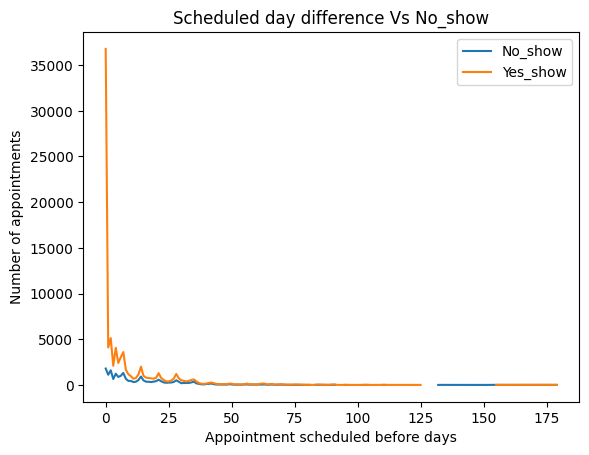

In [115]:
# Creating plot
diff.plot(kind='line',
          title='Scheduled day difference Vs No_show',
          xlabel='Appointment scheduled before days',
          ylabel='Number of appointments');

Since the 0 days value is too high , we could it see it well, so we are removing 0 days value to have good comparison

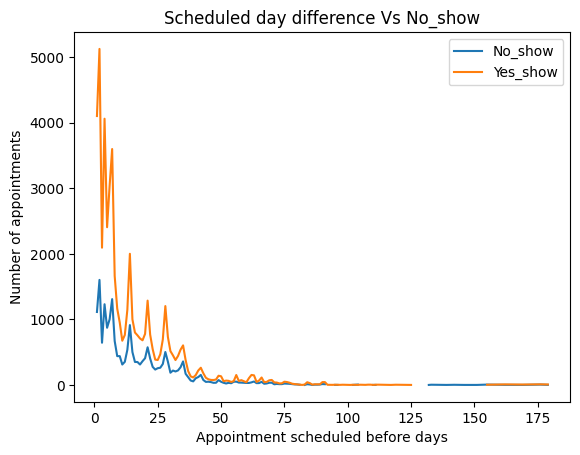

In [116]:
# Plotting without 0 day
diff.loc[1:,:].plot(kind='line',
                    title='Scheduled day difference Vs No_show',
                    xlabel='Appointment scheduled before days',
                    ylabel='Number of appointments');

- By comparing days difference with no show data, its clear both are following same pattern irrespective of increase in days.But appointments booked within 30 days has higher show rate

### Research Question 2:  In which location most of appointments are not honored?

In [117]:
df['neighbourhood'].describe()

count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

- Location Jardim camburi has higher number of appointments booked

In [118]:
location = df.groupby(['no_show','neighbourhood'],as_index=False)['no_show'].count()
location

,neighbourhood,no_show
0,AEROPORTO,7
1,ANDORINHAS,1741
2,ANTÔNIO HONÓRIO,221
3,ARIOVALDO FAVALESSA,220
4,BARRO VERMELHO,332
...,...,...
155,SÃO JOSÉ,428
156,SÃO PEDRO,515
157,TABUAZEIRO,573
158,UNIVERSITÁRIO,32


In [119]:
# To get yes show and no show data, we split dataframe as two
showloc = location[:80]
noshowloc = location[80:]

In [120]:
# By joining two dataset on neighbourhood will give us 
# no-show data in two columns
locat = pd.merge(showloc,noshowloc,how='left',on='neighbourhood')
locat

,neighbourhood,no_show_x,no_show_y
0,AEROPORTO,7,1.0
1,ANDORINHAS,1741,521.0
2,ANTÔNIO HONÓRIO,221,50.0
3,ARIOVALDO FAVALESSA,220,62.0
4,BARRO VERMELHO,332,91.0
...,...,...,...
75,SÃO JOSÉ,1549,428.0
76,SÃO PEDRO,1933,515.0
77,TABUAZEIRO,2559,573.0
78,UNIVERSITÁRIO,120,32.0


In [121]:
#Check data for null values
locat.isnull().sum()

neighbourhood    0
no_show_x        0
no_show_y        1
dtype: int64

In [122]:
# Filling Nan values with 0
locat.fillna(0,inplace=True)

In [123]:
# Checking data for result
locat.isnull().sum()

neighbourhood    0
no_show_x        0
no_show_y        0
dtype: int64

In [124]:
locat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  80 non-null     object 
 1   no_show_x      80 non-null     int64  
 2   no_show_y      80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [125]:
# Fix the datatype of third column to int
locat.no_show_y = locat.no_show_y.astype('int')

In [126]:
locat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  80 non-null     object
 1   no_show_x      80 non-null     int64 
 2   no_show_y      80 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [127]:
# Changing index to plot
locat.set_index('neighbourhood',inplace=True)

In [128]:
# Sorting to get higher no-show location
locat.sort_values(by='no_show_y',ascending=False)[:5]

,no_show_x,no_show_y
neighbourhood,,
JARDIM CAMBURI,6252,1465
MARIA ORTIZ,4586,1219
ITARARÉ,2591,923
RESISTÊNCIA,3525,906
CENTRO,2631,703


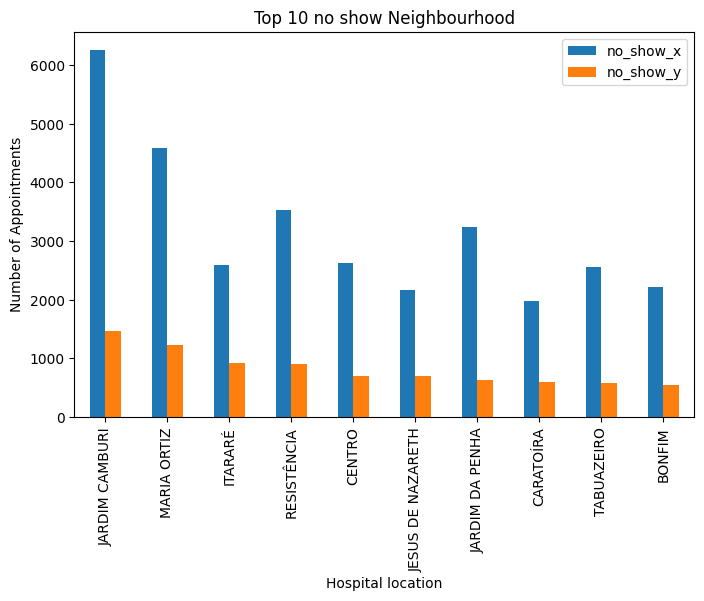

In [129]:
locat.sort_values(by='no_show_y',ascending=False)[:10].plot(kind='bar',
xlabel='Hospital location',ylabel='Number of Appointments', 
title= 'Top 10 no show Neighbourhood',figsize=(8,5));

- By looking at plot we can conclude Jardim Camburi location has higher No-show of 1465. 
- But considering total appoinments to no-show location Itarare , Jesus de nazareth has higher no-show.

In [130]:
locat['nosh_per'] = locat['no_show_y']/(locat['no_show_x']+locat['no_show_y'])

In [131]:
locat.sort_values(by='no_show_y',ascending=False)[:10]

,no_show_x,no_show_y,nosh_per
neighbourhood,,,
JARDIM CAMBURI,6252,1465,0.189841
MARIA ORTIZ,4586,1219,0.209991
ITARARÉ,2591,923,0.262664
RESISTÊNCIA,3525,906,0.204469
CENTRO,2631,703,0.210858
JESUS DE NAZARETH,2157,696,0.243954
JARDIM DA PENHA,3246,631,0.162755
CARATOÍRA,1974,591,0.230409
TABUAZEIRO,2559,573,0.182950


- Location Itarare, Jesus De nazareth has no show of 26% , 24% respectively.
- We can conclude that Location Itarare has high no-show. This may lead to further investication Why? Is there any issue in service? Does location has any other facility drawback?.

### Research Question 3: Which age group has more diabetic and hypertension problem?

In [132]:
df['age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

- We can make age group as three buckets, Below 30, 30-60 and above 60

In [133]:
# Getting index of age of below 30
df[df['age']<=30].index

Int64Index([     3,      6,      8,      9,     10,     11,     12,     13,
                15,     18,
            ...
            110493, 110502, 110504, 110506, 110507, 110511, 110513, 110517,
            110519, 110524],
           dtype='int64', length=45632)

In [134]:
# Getting index of age of above 60
df[df['age']>60].index

Int64Index([     0,      2,      5,     24,     32,     34,     36,     37,
                38,     41,
            ...
            110459, 110468, 110471, 110476, 110477, 110488, 110497, 110499,
            110503, 110510],
           dtype='int64', length=19762)

In [135]:
# Creating new column with dummy value
df['age_group'] = 'a'
# Assigning new value to each group
df.loc[df[df['age']<=30].index,'age_group'] = 'Below 30'
df.loc[df[df['age']>60].index,'age_group'] = 'Above 60'
df['age_group'].replace('a','30-60',inplace=True)

In [136]:
df['age_group'].value_counts()

Below 30    45632
30-60       45133
Above 60    19762
Name: age_group, dtype: int64

In [137]:
df.groupby(['age_group'])[['hypertension','diabetes']].sum()

,hypertension,diabetes
age_group,,
30-60,10435,3388
Above 60,11002,4387
Below 30,364,168


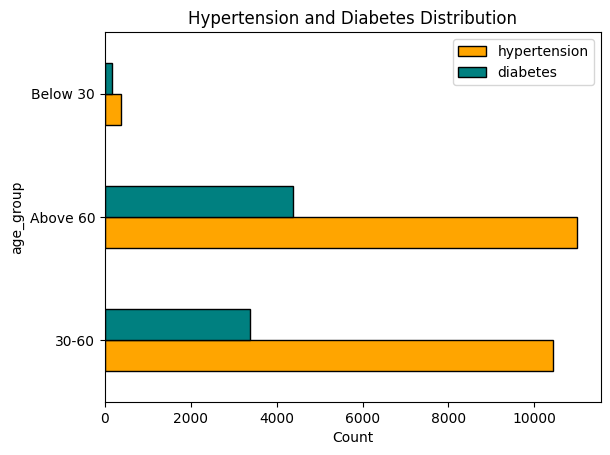

In [138]:
df.groupby(['age_group'])[['hypertension','diabetes']].sum().plot(kind='barh',
    title='Hypertension and Diabetes Distribution',xlabel='Count',
     edgecolor='black',color=['orange','teal']);

- Age group above 60 has more patients with Hypertension and Diabetes.

### Research Question 4 : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [139]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,datediff,appt_day,age_group
0,0,-105,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,Above 60
1,0,7,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,30-60
2,0,53,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,Above 60
3,0,76,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,Below 30
4,0,-2,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,30-60


### Gender

In [140]:
# function for creating bar chart
def bar_chart(col):
    dfcol = df.pivot_table(values='appointmentid',
                           index=col,
                           columns='no_show',
                           aggfunc='count')
    print(dfcol)
    dfcol.plot(kind='bar',
                   title=col,
                   xlabel=col,
                   ylabel='Count',
                   rot=0,
                   figsize=(8,4),
                   color=['#742802','orange'])

no_show     No    Yes
gender               
F        57246  14594
M        30962   7725


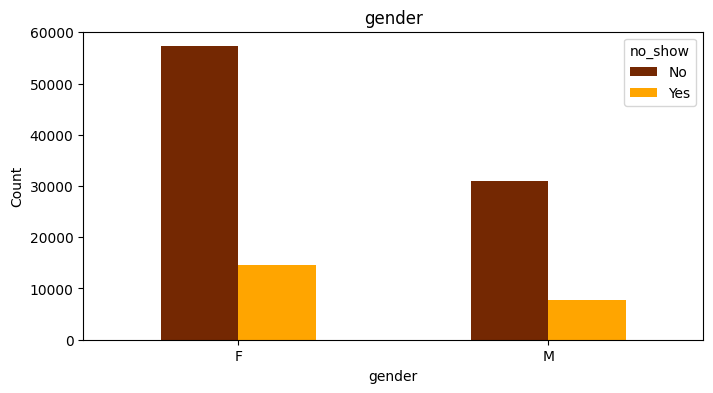

In [141]:
# Checking on Gender
bar_chart('gender')

In [142]:
14/71,7/37

(0.19718309859154928, 0.1891891891891892)

- Both the gender has no show percentage is almost same. So gender cannot be considered for not showing up for appointment

### Day of week

In [143]:
# Checking on day of week
day_df = df.pivot_table(values='appointmentid',
    index='appt_day',
    columns='no_show',
    aggfunc='count',
    )

no_show      No   Yes
appt_day             
0         18025  4690
1         20488  5152
2         20774  5093
3         13909  3338
4         14982  4037
5            30     9


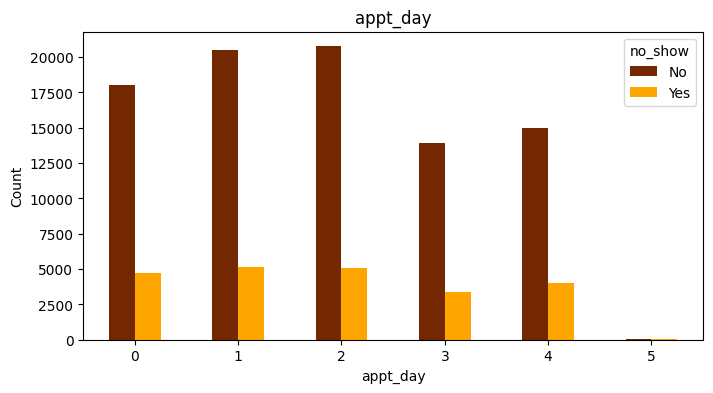

In [144]:
bar_chart('appt_day')

In [145]:
day_df['percent'] = day_df['Yes']/(day_df['No']+day_df['Yes'])
day_df

no_show,No,Yes,percent
appt_day,,,
0,18025,4690,0.206471
1,20488,5152,0.200936
2,20774,5093,0.196892
3,13909,3338,0.193541
4,14982,4037,0.212261
5,30,9,0.230769


 - We can ignore Saturday result due to less volume. 
 - 21% of people not showing up on Friday, it is slightly higher than other weekdays.
 - We can conclude that day of week is not affecting no-show.

### Age group

no_show       No    Yes
age_group              
30-60      36310   8823
Above 60   16756   3006
Below 30   35142  10490


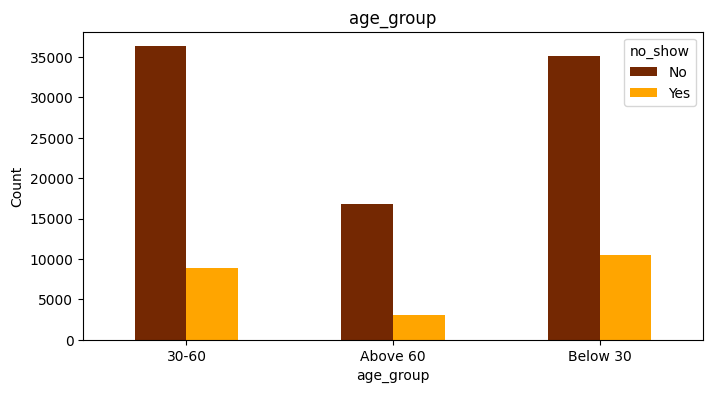

In [146]:
# Checking on age
bar_chart('age_group')

- It's very clear agegroup is affecting honoring appointment. People above 60 show rate is high, whereas below 30 is low.

### Boolean columns

In [147]:
df.pivot_table(values=['alcoholism','hypertension','diabetes','sms_received'],
    index='no_show',
    aggfunc='sum',
    )

,alcoholism,diabetes,hypertension,sms_received
no_show,,,,
No,2683,6513,18029,25698
Yes,677,1430,3772,9784



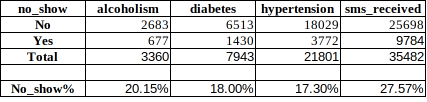

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
The following factors might have impact on predicting if the patient will show up for their scheduled appointment
- Age group
- Alcoholism
- SMS received has negative impact
- Days difference between schedule and appoinment day

<a id='conclusions'></a>
## Conclusions

This data collected from April 29th to June 8th, which is just 40 days of data. This short period data cannot be reliable to make strong conclusion on correlation. 

#### 1.Does appointment scheduled much earlier has any effect on no_show?

- By comparing days difference with no show data, its clear both are following same pattern irrespective of increase in days.But appointments booked within 30 days has higher show rate


#### 2.In which location most of appointments are not honored?
- Location Itarare, Jesus De nazareth has no show of 26% , 24% respectively.
- We can conclude that Location Itarare has high no-show. This may lead to further investication on Why? 
- Is there any issue in service? Does location has any other facility drawback? for that analysis we need some more data.


#### 3.Which age group has more diabetic and hypertension?
- Age group above 60 has more patients with Hypertension and Diabetes.

#### 4.What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

- The following factors might have impact on predicting if the patient will show up for their scheduled appointment
-- Age group
-- Alcoholism
-- SMS received has negative impact
-- Days difference between schedule and appoinment day



In [148]:
# Running this cell will execute a bash command to convert this notebook to an .html file
#!python -m nbconvert --to html Investigate_a_Dataset.ipynb